In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import seaborn as sns
from typing import TypeAlias
from sklearn.model_selection import train_test_split

### Теоретический материал – Деревья принятия решений
Деревья решений являются одним из наиболее эффективных инструментов интеллектуального анализа данных и предсказательной аналитики, которые позволяют решать задачи классификации и регрессии.

Перед тем как непосредственно перейти к решению задач с использование данного инструмента рассмотрим общее понятие "дерево" в информатике и способы задания деревьев в языке Python.

Деревья принадлежат к числу основных структур данных, используемых в программировании. Древовидная структура является одним из способов представления иерархической структуры в графическом виде. Такое название она получила потому, что граф выглядит как перевернутое дерево. Корень дерева (корневой узел) находится на самом верху, а листья (потомки) — внизу.

Деревья широко применяются в компьютерных технологиях. Примером является файловая система, представляющая собой иерархическую структуру из файлов и каталогов.

Схематично дерево и его основные элементы приведены на рисунке ниже.

<img src="./imgs/tree.png" width="300px">

На рисунке изображены родительские отношения (ребра, ветви дерева) между узлами (вершинами) дерева. На верхнем уровне каждый «родитель» указывает на своих «потомков». То есть в этой иерархической структуре вершина всегда «знает» своих потомков.

Для того чтобы более точно оперировать структурой Дерево, нужно дать определение некоторым ключевым понятиям:

- корневой узел — самый верхний узел дерева, он не имеет предков;
- лист, листовой или терминальный узел — конечный узел, то есть не имеющий потомков;
- внутренний узел — любой узел дерева, имеющий потомков, то есть не лист.

С корневого узла начинается выполнение большинства операций над деревом. Чтобы получить доступ к любому элементу структуры, необходимо, переходя по ветвям, перебирать элементы, начиная с головы — корневого узла. Корневой узел — это своеобразный вход в дерево. Большинство алгоритмов работы с деревом строятся на том, что каждый узел дерева рассматриваются как корневой узел поддерева, «растущего» из этого узла. Такой подход дает возможность зацикливать выполнение операций при прохождении по элементам дерева. Но в связи с тем, что при прохождении по дереву (в отличие от массива) неизвестно сколько шагов будет в этом цикле, используется другой инструмент — рекурсивный вызов.

Двоичное (бинарное) дерево — это древовидная структура данных, где каждый узел имеет не более двух детей. Этих детей называют левым (Л) и правым (П) потомком или «сыном». На рисунке выше дерево является двоичным.

### 1.1. Теоретический материал – Основы объектно- ориентированного программирования в Python

В предыдущих разделах мы рассматривали в основном традиционное программирование на Python, когда вся программа разбивается (или не разбивается) на отдельные модули, содержащие функции. Такое программирование соответствует парадигме структурного программирования. Само структурное программирование оказалось колоссальным шагом в построении программ. Однако еще большим шагом является парадигма объектно-ориентированного программирования. В этом подходе программа состоит из отдельных классов, которые объединяют в себе как переменные, называемые полями класса, так и функции, называемые методами класса.

На самом деле мы уже сталкивались с классами, когда создавали объекты для решения задач классификации и регрессии в Scikit-learn. В данном разделе подробнее познакомимся с основами объектно- ориентированного программирования (ООП).

Объектно-ориентированное программирование состоит из трех китов:

- инкапсуляция;
- наследование;
- полиморфизм.

<img src="./imgs/meme.png" width="500px">

Рассмотрим на примерах эти понятия. Первое - инкапсуляция - это объединение в одном объекте данных и программного кода таким образом, что для внешней работы внутренняя часть объекта может быть скрыта от пользователя. Инкапсуляция может быть реализована не только с помощью классов, но и с помощью модулей, но классы позволяют сделать инкапсуляцию естественным путем. Создадим класс в Python. Для этого необходимо определить класс (новый тип данных) и создать объект, называемый экземпляром класса. Мы рекомендуем имена классов начинать с заглавной буквы "T", подчеркивая тем самым, что речь идет о типе данных. 

Делается это так:

```python
class TAnimal:
    name = ""
    def __init__(self, name):
        self.name = name 
    def say(self):
        print(self.name)
```

Теперь создадим экземпляр этого класса. Экземпляр класса представляет собой переменную, с которой можно работать обычным образом.

```python
Animal = TAnimal("Обезьяна")
Animal.say()
```

Рассмотрим синтаксис Python при создании классов. Все начинается с ключевого слова `class`. Далее в блоке из отступов мы определяем переменные, которые будем называть полями и функции, которые называются методами. Методы определяются, как обычные функции и могут возвращать значения. Единственное отличие состоит в том, что у всех методов есть обязательный первый параметр, который по традиции всегда называем self в котором передается ссылка на экземпляр класса. Поэтому когда внутри класса метод хочет обратиться к своему полю, то необходимо использовать конструкцию `self.name`. Заметим, что при вызове методов мы первый параметр не задаем.

Далее, у каждого класса есть метод, с именем `__init__`, который называется конструктором класса. Этот метод вызывается в момент создания экземпляра `Animal = TAnimal("Обезьяна")`. Конструктор может иметь любое количество параметров. Предположим, что теперь нам нужно сделать класс для описания конкретного животного - кошки. Для это мы используем наследование классов, когда можно определять новые классы, как наследники существующих. При этом новый класс будет иметь все поля и методы наследуемого класса. 

Вот как это делается:

```python
class TAnimal:
    name = ""
    
    def __init__(self, name):
        self.name = name
    
    def say(self):
        print(self.name)

class TCat(TAnimal):
    def may(self): 
        print("Мяу!")
        
Cat = TCat("Кошка") 
Cat.say()
Cat.may()
```

Мы видим, что у наследованного класса сохранился конструктор и метод `say`. В последнем примере мы выдели, что наследный класс, также как и исходный имеет конструктор, который принимает в качестве параметра - название животного тогда, что в данном случае излишне. Для решения этой проблемы мы воспользуемся объектно-ориентированным механизмом - полиморфизмом. Полиморфизм - это возможность замены методов при наследовании. Сделаем так, чтобы не нужно было передавать в конструкторе название "Кошка".

```python
class TCat(TAnimal): 
    def __init__(self):
        super().__init__("Кошка") 
    def may(self):
        print("Мяу!")

Cat = TCat()
Cat.say()
Cat.may()
```

Результат выполнения этой программы будет аналогичный, но теперь
при использовании этого класса нам не нужно передавать в конструкторе никаких параметров. Полиморфное перекрытие методов делается простым объявлением метода (в данном случае конструктора). При этом нельзя можно менять входные параметры. Если в результате написания кода метода возникает необходимость вызвать перекрытый метод, то для этого необходимо использовать функцию `super()`, которая по сути просто возвращает ссылку на родительский класс. Самое удивительное в полиморфизме, что изменяя метод, он меняется даже когда на него есть ссылки родительского класса. Рассмотрим еще один пример. Пусть у нас есть класс:

```python
class TDo:
    def Operation(self, x, y):
        return x + y 
    
    def Run(self):
        x = int(input("Enter x > "))
        y = int(input("Enter y > "))
        z = self.Operation(x, y) 
        print("Result = " + z.__str__())
        

Do = TDo()
Do.Run()
```

С помощью полиморфизма заменим функцию Operation на другую в наследном классе:

```python
class TDo2(TDo):
    def Operation(self, x, y):
        return x * y
```

### 1.2.1 Пример

#### Задача:

Необходимо разработать виртуальную модель процесса обучения. В программе должны быть объекты-ученики, учитель, кладезь знаний.
<hr>

Потребуется три класса – "учитель", "ученик", "данные". Учитель и ученик во многом похожи, оба – люди. Значит, их классы могут принадлежать одному надклассу "человек". Однако в контексте данной задачи у учителя и ученика вряд ли найдутся общие атрибуты. Определим, что должны уметь объекты для решения задачи "увеличить знания":

- Ученик должен уметь брать информацию и превращать ее в свои знания.
- Учитель должен уметь учить группу учеников.
- Данные могут представлять собой список знаний. Элементы будут извлекаться по индексу.
#### Решение:

In [3]:
class Data:
    def __init__(self, *info):
        self.info = list(info)

    def __getitem__(self, i):
        return self.info[i]

class Teacher:
    def teach(self, info, *pupil):
        for i in pupil:
            i.take(info)

class Pupil:
    def __init__(self):
        self.knowledge = []
    
    def take(self, info):
        self.knowledge.append(info)

lesson = Data('class', 'object', 'inheritance', 'polymorphism', 'encapsulation')
marIvanna = Teacher()
vasy = Pupil()
pety = Pupil()
marIvanna.teach(lesson[2], vasy, pety)
marIvanna.teach(lesson[0], pety)
print(vasy.knowledge)
print(pety.knowledge)

['inheritance']
['inheritance', 'class']


### 1.2.2 Пример

#### Задача:

Напишите программу по следующему описанию. Есть класс "Воин". От
него создаются два экземпляра-юнита. Каждому устанавливается здоровье в 100 очков. В случайном порядке они бьют друг друга. Тот, кто бьет, здоровья не теряет. У того, кого бьют, оно уменьшается на 20 очков от одного удара. После каждого удара надо выводить сообщение, какой юнит атаковал, и сколько у противника осталось здоровья. Как только у кого-то заканчивается ресурс здоровья, программа завершается сообщением о том, кто одержал победу.

#### Решение:

In [5]:
class Warrior:
    def __init__(self, health):
        self.health = health
    
    def hit(self, target, target1):
        if target.health > 0:
            target.health -= 20
        if target1 == warrior1:
            target1 = "Warrior1"
        if target1 == warrior2:
            target1 = "Warrior2"
        print(f"{target1} has attacked")
        print(f"{target.health} left")
        if target.health == 0:
            print(f"{target1} has won")

warrior1 = Warrior(100)
warrior2 = Warrior(100)
q = int(input("Enter 1 to attack. Enter 2 to stop program:"))

while q != 2:
    if q == 1:
        j = np.random.randint(1, 3)
        if j % 2 == 0:
            warrior1.hit(warrior2, warrior1)
            q = int(input("Enter 1 to let some warrior attack:"))
        else:
            warrior2.hit(warrior1, warrior2)
            q = int(input("Enter 1 to let some warrior attack:"))
    else:
        print("Wrong input.")
        break

Enter 1 to attack. Enter 2 to stop program:1
Warrior2 has attacked
80 left
Enter 1 to let some warrior attack:1
Warrior2 has attacked
60 left
Enter 1 to let some warrior attack:1
Warrior1 has attacked
80 left
Enter 1 to let some warrior attack:1
Warrior2 has attacked
40 left
Enter 1 to let some warrior attack:1
Warrior2 has attacked
20 left
Enter 1 to let some warrior attack:1
Warrior2 has attacked
0 left
Warrior2 has won
Enter 1 to let some warrior attack:2


### 1.2.3 Пример

#### Задача:

Создайте класс по работе с дробями. В классе должна быть реализована следующая функциональность:

- сложение дробей;
- вычитание дробей;
- умножение дробей;
- деление дробей.
#### Решение:

In [9]:
class Rational:
    
    @staticmethod
    def gcd(a, b):
        while b != 0:
            a, b = b, a % b
        return a
    
    @staticmethod
    def sign(x):
        return max(-1, min(x, 1))
    
    def __init__(self, n, d):
        if n == 0:
            self.num = 0
            self.den = 1
        else:
            z = self.sign(n) * self.sign(d)
            n = abs(n)
            d = abs(d)
            k = self.gcd(n, d)
            self.num = z * n//k
            self.den = d//k
    
    def __str__(self):
        if self.num == 0:
            return 0
        else:
            return f"{self.num}/{self.den}"
    
    def __add__(self, o):
        n1 = self.num
        d1 = self.den
        if type(o) == int:
            n2 = o
            d2 = 1
        else:
            n2 = o.num
            d2 = o.den
        n = n1 * d2 + n2 * d1
        d = d1 * d2
        return Rational(n, d)
    
    def __radd__(self, o):
        return self + o
    
    def __sub__(self, o):
        return self + Rational(-o.num, o.den)
    
    def __mul__(self, o):
        return Rational(self.num * o.num, self.den * o.den)
    
    def __floordiv__(self, o):
        return self * Rational(o.den, o.num)

d1 = Rational(1, 2)
d2 = Rational(1, 3)
print(d1 + d2)
print(d1 - d2)
print(d1 * d2)
print(d1 * d2)
print(d1//d2)
print(6 + d1)

5/6
1/6
1/6
1/6
3/2
13/2


### 1.2.4 Задание

#### Задача:

Создайте класс по работе с тригонометрическими функциями. В классе должны быть реализованы функции вычисления:
- косинуса;
- синуса;
- тангенса;
- арксинуса;
- арккосинуса;
- арктангенса;
- перевода из градусов в радианы.
#### Решение:

In [17]:
Degrees: TypeAlias = float
Radians: TypeAlias = float

class Trigonometry:
    
    @staticmethod
    def sin(x: Degrees) -> float:
        return m.sin(Trigonometry.to_radians(x))
    
    @staticmethod
    def cos(x: Degrees) -> float:
        return m.cos(Trigonometry.to_radians(x))

    @staticmethod
    def tan(x: Degrees) -> float:
        return m.tan(Trigonometry.to_radians(x))
    
    @staticmethod
    def asin(x: float) -> Degrees:
        return Trigonometry.to_degrees(m.asin(Trigonometry.to_radians(x)))
    
    @staticmethod
    def acos(x: float) -> Degrees:
        return Trigonometry.to_degrees(m.acos(Trigonometry.to_radians(x)))
    
    @staticmethod
    def atan(x: float) -> Degrees:
        return Trigonometry.to_degrees(m.atan(Trigonometry.to_radians(x)))
    
    @staticmethod
    def to_radians(x: Degrees) -> Radians:
        return x * m.pi / 180
    
    @staticmethod
    def to_degrees(x: Radians) -> Degrees:
        return x * 180 / m.pi

print(
    f"cos(90deg) = {Trigonometry.cos(90):.3f}",
    f"sin(90deg) = {Trigonometry.sin(90):.3f}",
    f"tan(0deg){Trigonometry.tan(0):.3f}",
    f"asin(1) = {Trigonometry.asin(1):.3f} deg",
    f"acos(1) = {Trigonometry.acos(1):.3f} deg",
    f"atan(1) = {Trigonometry.atan(1):.3f} deg",
    sep='\n',
)

cos(90deg) = 0.000
sin(90deg) = 1.000
tan(0deg)0.000
asin(1) = 1.000 deg
acos(1) = 89.000 deg
atan(1) = 1.000 deg


### 1.2. Теоретический материал – Реализация деревьев в Python

Любое представление графов, естественно, можно использовать для представления деревьев, потому что деревья — это особый вид графов. Однако, деревья играют свою большую роль в алгоритмах, и для них
разработано много соответствующих структур и методов. Большинство алгоритмов на деревьях (например, поиск по деревьям) можно рассматривать в терминах теории графов, но специальные структуры данных делают их проще в реализации.

Проще всего описать представление дерева с корнем, в котором ребра спускаются вниз от корня. Такие деревья часто отображают иерархическое ветвление данных, где корень отображает все объекты (которые, возможно, хранятся в листьях), а каждый внутренний узел показывает объекты, содержащиеся в дереве, корень которого — этот узел. Это описание можно использовать, представив каждое поддерево списком, содержащим все его поддеревья-потомки. Рассмотрим простое дерево, показанное на рисунке ниже.

<img src="imgs/tree1.png" width="500px">

Мы можем представить это дерево как список списков:
```python
T = [["a", "b"], ["c"], ["d", ["e", "f"]]]
print(T[0][1])
print(T[2][1][0])
```

Каждый список в сущности является списком потомков каждого из
внутренних узлов. Во втором примере мы обращаемся к третьему потомку корня, затем ко второму его потомку и в конце концов — к первому потомку предыдущего узла (этот путь отмечен на рисунке). В ряде случаев возможно заранее определить максимальное число потомков каждого узла. (Например, каждый узел бинарного дерева может иметь до двух потомков). Поэтому можно использовать другие представления, скажем, объекты с отдельным атрибутом для каждого из потомков как в листинге ниже.


### 1.2.1 Пример
#### Задача:

Определите класс бинарного дерева и задайте его объекты с отдельным атрибутом для каждого из потомков.

#### Решение:

In [10]:
class Tree:
    def __init__(self, left, right):
        self.left = left
        self.right = right

t = Tree(Tree("a", "b"), Tree("c", "d"))
t.right.left

'c'

### 1.2.2 Пример
#### Задача:

Для обозначения отсутствующих потомков можно использовать None (в случае если у узла только один потомок). Само собой, можно комбинировать разные методы (например, использовать списки или множества потомков для каждого узла).

Распространенный способ реализации деревьев, особенно на языках, не имеющих встроенной поддержки списков, это так называемое представление «первый потомок, следующий брат». В нем каждый узел имеет два «указателя» или атрибута, указывающих на другие узлы, как в
бинарном дереве. Однако, первый из этих атрибутов ссылается на первого потомка узла, а второй — на его следующего брата (т.е. узел, имеющий того же родителя, но находящийся правее, — прим. перев). Иными словами, каждый узел дерева имеет указатель на связанный список его потомков, а каждый из этих потомков ссылается на свой собственный аналогичный список. Таким образом, небольшая модификация бинарного дерева даст нам многопутевое дерево, показанное в листинге ниже.

#### Решение:

In [27]:
class Tree:
    def __init__(self, val, kids = None):
        self.val = val
        self.kids = kids or None

t = Tree("a", [Tree("b", [Tree("c", Tree("d"))])])
t.kids[0].kids[0].val

'c'

#### Задание:
Представьте дерево показанное на рисунке с использованием списка из списков. Выведите на печать корень дерева, а также его левое и правое поддеревья.

In [29]:
t = Tree("a", 
    [
        Tree("b", 
             [
                 Tree("d"), 
                 Tree("e")
             ]
        ), 
        Tree("c", 
             [
                 Tree("f")
             ]
        ),
    ]
)
print(t.val)
print(t.kids[0].val, t.kids[0].kids[0].val, t.kids[0].kids[1].val)
print(t.kids[1].val, t.kids[1].kids[0].val)

a
b d e
c f


#### Задание:

Дан класс, описывающий бинарное дерево.

In [32]:
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

    def PrintTree(self): 
        print(self.data)

Реализуйте в классе функцию для вставки нового элемента в дерево по следующим правилам:

- Левое поддерево узла содержит только узлы со значениями меньше, чем значение в узле.
- Правое поддерево узла содержит только узлы со значениями меньше, чем значение в узле.
- Каждое из левого и правого поддеревьев также должно быть бинарным деревом поиска.
- Не должно быть повторяющихся узлов.

Метод вставки сравнивает значение узла с родительским узлом и решает куда доваить элемент (в левое или правое поддерево). Перепишите, метод PrintTree для печати полной версии дерева.

In [49]:
class SearchTree(Tree):
    
    def __init__(self, data):
        super().__init__(data)
    
    def insert(self, data):
        if self.data == data:
            return
        
        if data < self.data:
            if self.left is None:
                self.left = SearchTree(data)
            else:
                self.left.insert(data)
        else:
            if self.right is None:
                self.right = SearchTree(data)
            else:
                self.left.insert(data)

                
    def sort(self, arr):
        if arr is None:
            return
        
        if self.left:
            self.left.sort(arr)
            
        arr.append(self.data)
        
        if self.right:
            self.right.sort(arr)
        
    def PrintTree(self):
        arr = []
        self.sort(arr)
        print(*arr)
        
s = SearchTree(1)
s.insert(2)
s.insert(-1)
s.insert(3)
s.insert(-5)
s.PrintTree()

-5 -1 3 1 2


### 1.3 Теоретический материал – Деревья решений

Дерево решений – это один из наиболее часто и широко используемых алгоритмов контролируемого машинного обучения, который может выполнять как регрессионные, так и классификационные задачи.

Использование деревьев решений для прогнозного анализа имеет ряд преимуществ:
1. Деревья решений могут быть использованы для прогнозирования как непрерывных, так и дискретных значений, т. е. они хорошо работают как для задач регрессии, так и для задач классификации.
2. Они требуют относительно меньших усилий для обучения алгоритма.
3. Они могут быть использованы для классификации нелинейно разделимых данных.
4. Они очень быстры и эффективны по сравнению с KNN и другими алгоритмами классификации.

Решим модельные примеры классификации и регрессии, разобранные в предыдущих раочих тетрадях, но с использованием деревьев принятия решений.

### 1.3.1 Пример

#### Задача:

Построим дерево решений для задачи классификации, для этого, построим границу решения для каждого класса. В качестве данных будем
использовать уже знакомый нам и встроенный в библиотеку sklearn набор данных ирисов Фишера. Импортируем библиотеки, набор данных и посмотрим его характеристики.

#### Решение:

In [53]:
ds = sns.load_dataset('iris')
ds.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Далее, разделим наши данные на атрибуты и метки, а затем выделим в общей совокупности полученных данных обучающие и тестовые наборы. Таким образом, мы можем обучить наш алгоритм на одном наборе данных, а затем протестировать его на совершенно на другом наборе, который алгоритм еще не видел. Это дает вам более точное представление о том, как на самом деле будет работать ваш обученный алгоритм.

In [57]:
x_train, x_test, y_train, y_test = train_test_split(
    ds.iloc[:, :-1],
    ds.iloc[:, -1],
    test_size=.20,
)
x_train.head(3)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
25,5.0,3.0,1.6,0.2
94,5.6,2.7,4.2,1.3


In [58]:
y_train.head(3)

14        setosa
25        setosa
94    versicolor
Name: species, dtype: object

После того, как данные были разделены на обучающие и тестовые наборы, последний шаг состоит в том, чтобы обучить алгоритм дерева решений на этих данных и сделать прогнозы. Scikit-Learn содержит библиотеку tree , которая содержит встроенные классы/методы для различных алгоритмов дерева решений. Поскольку мы собираемся выполнить здесь задачу классификации, мы будем использовать класс DecisionTreeClassifier для этого примера. Метод fit этого класса вызывается для обучения алгоритма на обучающих данных, которые передаются в качестве параметра методу fit . Выполним следующий сценарий для обучения алгоритма.

In [60]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.65\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(0.2, 0.5, 'x[2] <= 5.0\ngini = 0.097\nsamples = 39\nvalue = [0, 37, 2]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.3, 'x[1] <= 2.75\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

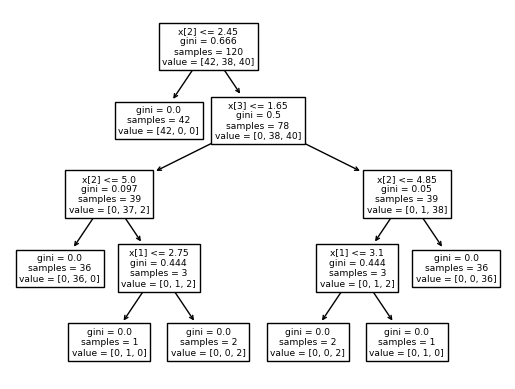

In [61]:
from sklearn import tree
tree.plot_tree(classifier)

Теперь, когда наш классификатор обучен, давайте сделаем прогнозы по тестовым данным. Для составления прогнозов используется метод `predict` класса `DecisionTreeClassifier`. Взгляните на следующий код для использования.

In [62]:
y_pred = classifier.predict(x_test)
y_pred

array(['versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor'], dtype=object)

На данный момент мы обучили наш алгоритм и сделали некоторые прогнозы. Теперь посмотрим, насколько точен наш алгоритм. Для задач классификации обычно используются такие метрики, как матрица путаницы, точность. Библиотека **Scikit-Learn** metrics содержит методы `classification_report` и `confusion_matrix`, которые могут быть использованы для расчета этих метрик.

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 11  1]
 [ 0  2  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.85      0.92      0.88        12
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



Из матрицы оценок алгоритма вы можете видеть, что из 30 тестовых экземпляров наш алгоритм неправильно классифицировал только 3. Это приблизительно 91 % точности.

### Задание

#### Задача:

Постройте классификатор на основе дерева принятия решений следующего датасета:

In [64]:
x = np.array([
    [-1, -1],
    [-2, -1],
    [-3, -2],
    [1, 1],
    [2, 1],
    [3, 2],
])
y = [0, 0, 0, 1, 1, 1]

#### Решение:


[Text(0.5, 0.75, 'x[0] <= 0.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

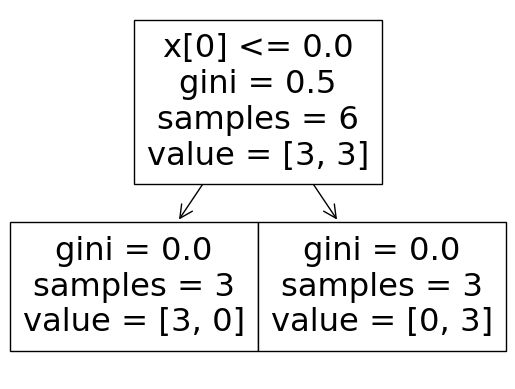

In [65]:
cl = DecisionTreeClassifier()
cl.fit(x, y)
tree.plot_tree(cl)

### 1.4. Теоретический материал – Дерево решений для регрессии
Дерево решений для регрессии

Процесс решения регрессионной задачи с деревом решений с помощью **Scikit Learn** очень похож на процесс классификации. Однако для регрессии мы используем класс `DecisionTreeRegressor` древовидной библиотеки. Кроме того, оценочные показатели регрессии отличаются от показателей классификации. В остальном процесс почти такой же.

Построим регрессию с использованием дерева решений в **Python** и библиотеки **scikit-learn**. В качестве исходного набора данных будем использовать зависимость заработной платы от опыта работы из предыдущей тетради: [ссылка](https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).


### 1.4.1 Пример

#### Задача:
Постройте регрессию с использованием дерева решений, реализованного в **Python**.

In [67]:
url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
ds = pd.read_csv(url)
ds.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Axes: xlabel='YearsExperience', ylabel='Salary'>

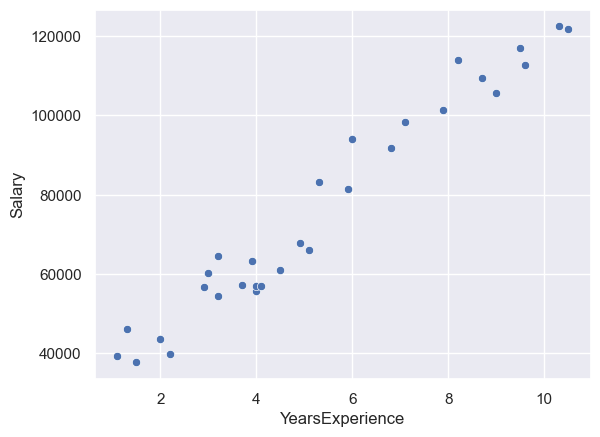

In [69]:
sns.set_theme()
sns.scatterplot(
    data=ds,
    x='YearsExperience',
    y='Salary',
 
)

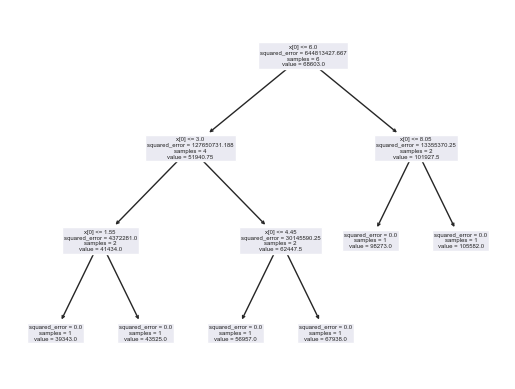

In [124]:
from sklearn.tree import DecisionTreeRegressor
x = ds.iloc[:, :-1].values
y = ds.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=0)

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

_ = tree.plot_tree(regressor)

In [125]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(3)

,Actual,Predicted
0,37731.0,39343.0
1,122391.0,105582.0
2,57081.0,56957.0


In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"{mae / np.average(y) * 100:.2f}%")

MSE: 108841387.54166667
MAE: 8171.875
10.75%


Средняя абсолютная ошибка для нашего алгоритма составляет 8172, что составляет менее 11 процентов от среднего значения всех значений в столбце.


### Задание
#### Задача:
Постройте модель регрессии для данных из предыдущей рабочей тетради.

Для примера можно взять [потребления газа](https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv) (в миллионах галлонов) в 48 штатах США или [набор данных о качестве красного вина](https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv): 
1. Постройте прогноз. 
1. Оцените точность модели.

In [93]:
url = r'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
df = pd.read_csv(url)
df.head(3)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561


In [129]:
x, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)
err = mean_absolute_error(y_test, pred)
print(f"Mean absolute error: {err}")
err_percent = err / np.average(y) * 100
print(f"An error is about {err_percent:.2f}% of an average consumption value")


Mean absolute error: 4882.6
An error is about 6.81% of an average consumption value
